#Import Library

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Read Data

In [101]:
data = pd.read_csv('loan_data_2007_2014.csv')
data.head()

D:\Programming\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Understanding

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [103]:
(data.isna().mean()*100).sort_values(ascending=False).head(30)

inq_last_12m                   100.000000
total_bal_il                   100.000000
dti_joint                      100.000000
verification_status_joint      100.000000
annual_inc_joint               100.000000
open_acc_6m                    100.000000
open_il_6m                     100.000000
open_il_12m                    100.000000
open_il_24m                    100.000000
mths_since_rcnt_il             100.000000
il_util                        100.000000
open_rv_24m                    100.000000
total_cu_tl                    100.000000
inq_fi                         100.000000
max_bal_bc                     100.000000
all_util                       100.000000
open_rv_12m                    100.000000
mths_since_last_record          86.566585
mths_since_last_major_derog     78.773926
desc                            72.981546
mths_since_last_delinq          53.690554
next_pymnt_d                    48.728567
tot_cur_bal                     15.071469
tot_coll_amt                    15

In [104]:
values_miss = data.isna().mean() * 100
column_values_miss = values_miss[values_miss > 40].index
column_values_miss

Index(['desc', 'mths_since_last_delinq', 'mths_since_last_record',
       'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'inq_fi', 'total_cu_tl', 'inq_last_12m'],
      dtype='object')

In [105]:
data.drop(column_values_miss, axis = 1, inplace = True)

In [106]:
data.drop('Unnamed: 0', inplace = True, axis = 1)

In [107]:
print('id',data['id'].nunique())
print('id_member',data['member_id'].nunique())

id 466285
id_member 466285


In [108]:
column = ['id','member_id','url','sub_grade','zip_code']
data.drop(column, axis=1, inplace= True)

# Variable Target

Tujuan utama pada credit risk adalah untuk melakukan prediksi terhadap suatu individu tentang seberapa mampu mereka untuk melakukan pembayaran terhadap pinjaman atau kredit yang diberikan.

Variabel yang digunakan sebagai variabel target dalam kasus ini adalah 'loan_status', alasannya adalah mencerminkan performa tiap individu terhadap pembayaran pada pinjaman atau kredit

In [109]:
data.loan_status.value_counts(normalize = True) * 100

Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: loan_status, dtype: float64

In [110]:
status_loan_bad = ['Charged Off', 'Late (31-120 days)', 'Default', 'Does not meet the credit policy. Status:Charged Off']
data['status_loan_bad'] = np.where(data['loan_status'].isin(status_loan_bad), 1, 0)

data.drop(columns = ['loan_status'], inplace = True)

In [111]:
data['status_loan_bad'].value_counts(normalize = True)*100

0    89.069346
1    10.930654
Name: status_loan_bad, dtype: float64

# Data Cleaning

In [112]:
data.iloc[:,0:16].head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title
0,5000,5000,4975.0,36 months,10.65,162.87,B,NaN,10+ years,RENT,24000.0,Verified,Dec-11,n,credit_card,Computer
1,2500,2500,2500.0,60 months,15.27,59.83,C,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,n,car,bike
2,2400,2400,2400.0,36 months,15.96,84.33,C,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,n,small_business,real estate business
3,10000,10000,10000.0,36 months,13.49,339.31,C,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,n,other,personel
4,3000,3000,3000.0,60 months,12.69,67.79,B,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,n,other,Personal
5,5000,5000,5000.0,36 months,7.90,156.46,A,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,n,wedding,My wedding loan I promise to pay back
6,7000,7000,7000.0,60 months,15.96,170.08,C,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,n,debt_consolidation,Loan
7,3000,3000,3000.0,36 months,18.64,109.43,E,MKC Accounting,9 years,RENT,48000.0,Source Verified,Dec-11,n,car,Car Downpayment
8,5600,5600,5600.0,60 months,21.28,152.39,F,NaN,4 years,OWN,40000.0,Source Verified,Dec-11,n,small_business,Expand Business & Buy Debt Portfolio
9,5375,5375,5350.0,60 months,12.69,121.45,B,Starbucks,< 1 year,RENT,15000.0,Verified,Dec-11,n,other,Building my credit history.


In [113]:
data.iloc[:,16:32].head(10)

,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp
0,AZ,27.65,0.0,Jan-85,1.0,3.0,0.0,13648,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00
1,GA,1.00,0.0,Apr-99,5.0,3.0,0.0,1687,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46
2,IL,8.72,0.0,Nov-01,2.0,2.0,0.0,2956,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00
3,CA,20.00,0.0,Feb-96,1.0,10.0,0.0,5598,21.0,37.0,f,0.00,0.00,12226.302210,12226.30,10000.00
4,OR,17.94,0.0,Jan-96,0.0,15.0,0.0,27783,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10
5,AZ,11.20,0.0,Nov-04,3.0,9.0,0.0,7963,28.3,12.0,f,0.00,0.00,5631.377753,5631.38,5000.00
6,NC,23.51,0.0,Jul-05,1.0,7.0,0.0,17726,85.6,11.0,f,1889.15,1889.15,8136.840000,8136.84,5110.85
7,CA,5.35,0.0,Jan-07,2.0,4.0,0.0,8221,87.5,4.0,f,0.00,0.00,3938.144334,3938.14,3000.00
8,CA,5.55,0.0,Apr-04,2.0,11.0,0.0,5210,32.6,13.0,f,0.00,0.00,646.020000,646.02,162.02
9,TX,18.08,0.0,Sep-04,0.0,2.0,0.0,9279,36.5,3.0,f,0.00,0.00,1476.190000,1469.34,673.48


In [114]:
data.iloc[:,32:48].head(10)

,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,status_loan_bad
0,861.07,0.00,0.00,0.00,Jan-15,171.62,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,0
1,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,1
2,603.65,0.00,0.00,0.00,Jun-14,649.91,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,0
3,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,0
4,1009.07,0.00,0.00,0.00,Jan-16,67.79,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,0
5,631.38,0.00,0.00,0.00,Jan-15,161.03,Sep-15,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,0
6,3025.99,0.00,0.00,0.00,Jan-16,170.08,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,0
7,938.14,0.00,0.00,0.00,Jan-15,111.34,Dec-14,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,0
8,294.94,0.00,189.06,2.09,Apr-12,152.39,Aug-12,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,1
9,533.42,0.00,269.29,2.52,Nov-12,121.45,Mar-13,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,1


In [115]:
data['term'] = data['term'].str.replace(' months', '')
data['term'] = data['term'].astype(float)

In [116]:
data['emp_length_num'] = data['emp_length'].str.replace('\+ years', '')
data['emp_length_num'] = data['emp_length_num'].str.replace('< 1 year', str(0))
data['emp_length_num'] = data['emp_length_num'].str.replace(' years', '')
data['emp_length_num'] = data['emp_length_num'].str.replace(' year', '')

data['emp_length_num'] = data['emp_length_num'].astype(float)
data.drop('emp_length', axis=1, inplace=True)

C:\Users\HP\AppData\Local\Temp/ipykernel_19956/2299077732.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['emp_length_num'] = data['emp_length'].str.replace('\+ years', '')


In [117]:
data['issue_d'] = pd.to_datetime(data['issue_d'], format='%b-%y')
data['issue_d_new'] = round(pd.to_numeric((pd.to_datetime('2023-06-03') - data['issue_d']) / np.timedelta64(1, 'M')))

In [ ]:
#any(data['issue_d_new'] < 0)

In [118]:
data.drop('issue_d', axis=1, inplace=True)

In [119]:
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'], format='%b-%y')
data['earliest_cr_line_new'] = round(pd.to_numeric((pd.to_datetime('2023-06-03') - data['earliest_cr_line']) / np.timedelta64(1, 'M')))

In [ ]:
#any(data['earliest_cr_line_new'] < 0)

In [120]:
data.loc[data['earliest_cr_line_new'] < 0, 'earliest_cr_line_new'] = data['earliest_cr_line_new'].max()

In [121]:
data.drop(['earliest_cr_line'], axis=1, inplace=True)

In [122]:
data['last_pymnt_d'] = pd.to_datetime(data['last_pymnt_d'], format='%b-%y')
data['last_pymnt_d_new'] = round(pd.to_numeric((pd.to_datetime('2023-06-03') - data['last_pymnt_d']) / np.timedelta64(1, 'M')))

In [ ]:
#any(data['last_pymnt_d_new'] < 0)

In [123]:
data.drop('last_pymnt_d', axis=1, inplace=True)

In [124]:
data['last_credit_pull_d'] = pd.to_datetime(data['last_credit_pull_d'], format='%b-%y')
data['last_credit_pull_d_new'] = round(pd.to_numeric((pd.to_datetime('2023-06-03') - data['last_credit_pull_d']) / np.timedelta64(1, 'M')))

In [ ]:
#any(data['last_credit_pull_d_new'] < 0)

In [125]:
data.drop('last_credit_pull_d', axis=1, inplace=True)

In [126]:
num = data.select_dtypes(exclude='object')  #num = numerik
cat = data.select_dtypes(include='object')  #cat = kategorik

In [127]:
col_cat = cat.columns
col_num = num.columns

for i in col_cat:
    df = data[i]
    print('variable nunique for {} : {}'.format(i, df.nunique()))
    
print('\n')

for j in col_num:
    df = data[j]
    print('variable nunique for {} : {}'.format(j, df.nunique()))

variable nunique for grade : 7
variable nunique for emp_title : 205475
variable nunique for home_ownership : 6
variable nunique for verification_status : 3
variable nunique for pymnt_plan : 2
variable nunique for purpose : 14
variable nunique for title : 63099
variable nunique for addr_state : 50
variable nunique for initial_list_status : 2
variable nunique for application_type : 1


variable nunique for loan_amnt : 1352
variable nunique for funded_amnt : 1354
variable nunique for funded_amnt_inv : 9854
variable nunique for term : 2
variable nunique for int_rate : 506
variable nunique for installment : 55622
variable nunique for annual_inc : 31901
variable nunique for dti : 3997
variable nunique for delinq_2yrs : 24
variable nunique for inq_last_6mths : 28
variable nunique for open_acc : 62
variable nunique for pub_rec : 26
variable nunique for revol_bal : 58142
variable nunique for revol_util : 1269
variable nunique for total_acc : 112
variable nunique for out_prncp : 135665
variable 

In [128]:
col_cat = cat.columns

for i in col_cat:
    df = data[i]
    print('distribution of label on variable {} : \n{}'.format(i, df.value_counts()))
    print('\n')

distribution of label on variable grade : 
B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: grade, dtype: int64


distribution of label on variable emp_title : 
Teacher                              5399
Manager                              4438
Registered Nurse                     2316
RN                                   2204
Supervisor                           1967
                                     ... 
The Eastern Arizona AHEC                1
Delaware Quarries.com                   1
McCauley trucking and warehousing       1
save mart supermarkets                  1
Server Engineer Lead                    1
Name: emp_title, Length: 205475, dtype: int64


distribution of label on variable home_ownership : 
MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          182
NONE            50
ANY              1
Name: home_ownership, dtype: int64


distribution of label on variable verification_status : 
Verified           168055
So

In [129]:
data.drop(['policy_code', 'application_type', 'emp_title', 'title', 'pymnt_plan'],axis = 1, inplace= True)

In [130]:
num = data.select_dtypes(exclude='object')
num_miss = num.isna().mean() * 100
col_num_miss = num_miss[num_miss > 0].index
print(len(col_num_miss))

cat = data.select_dtypes(include='object')
cat_miss = cat.isna().mean() * 100
col_cat_miss = cat_miss[cat_miss > 0].index
print(len(col_cat_miss))

16
0


D:\Programming\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Programming\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Programming\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

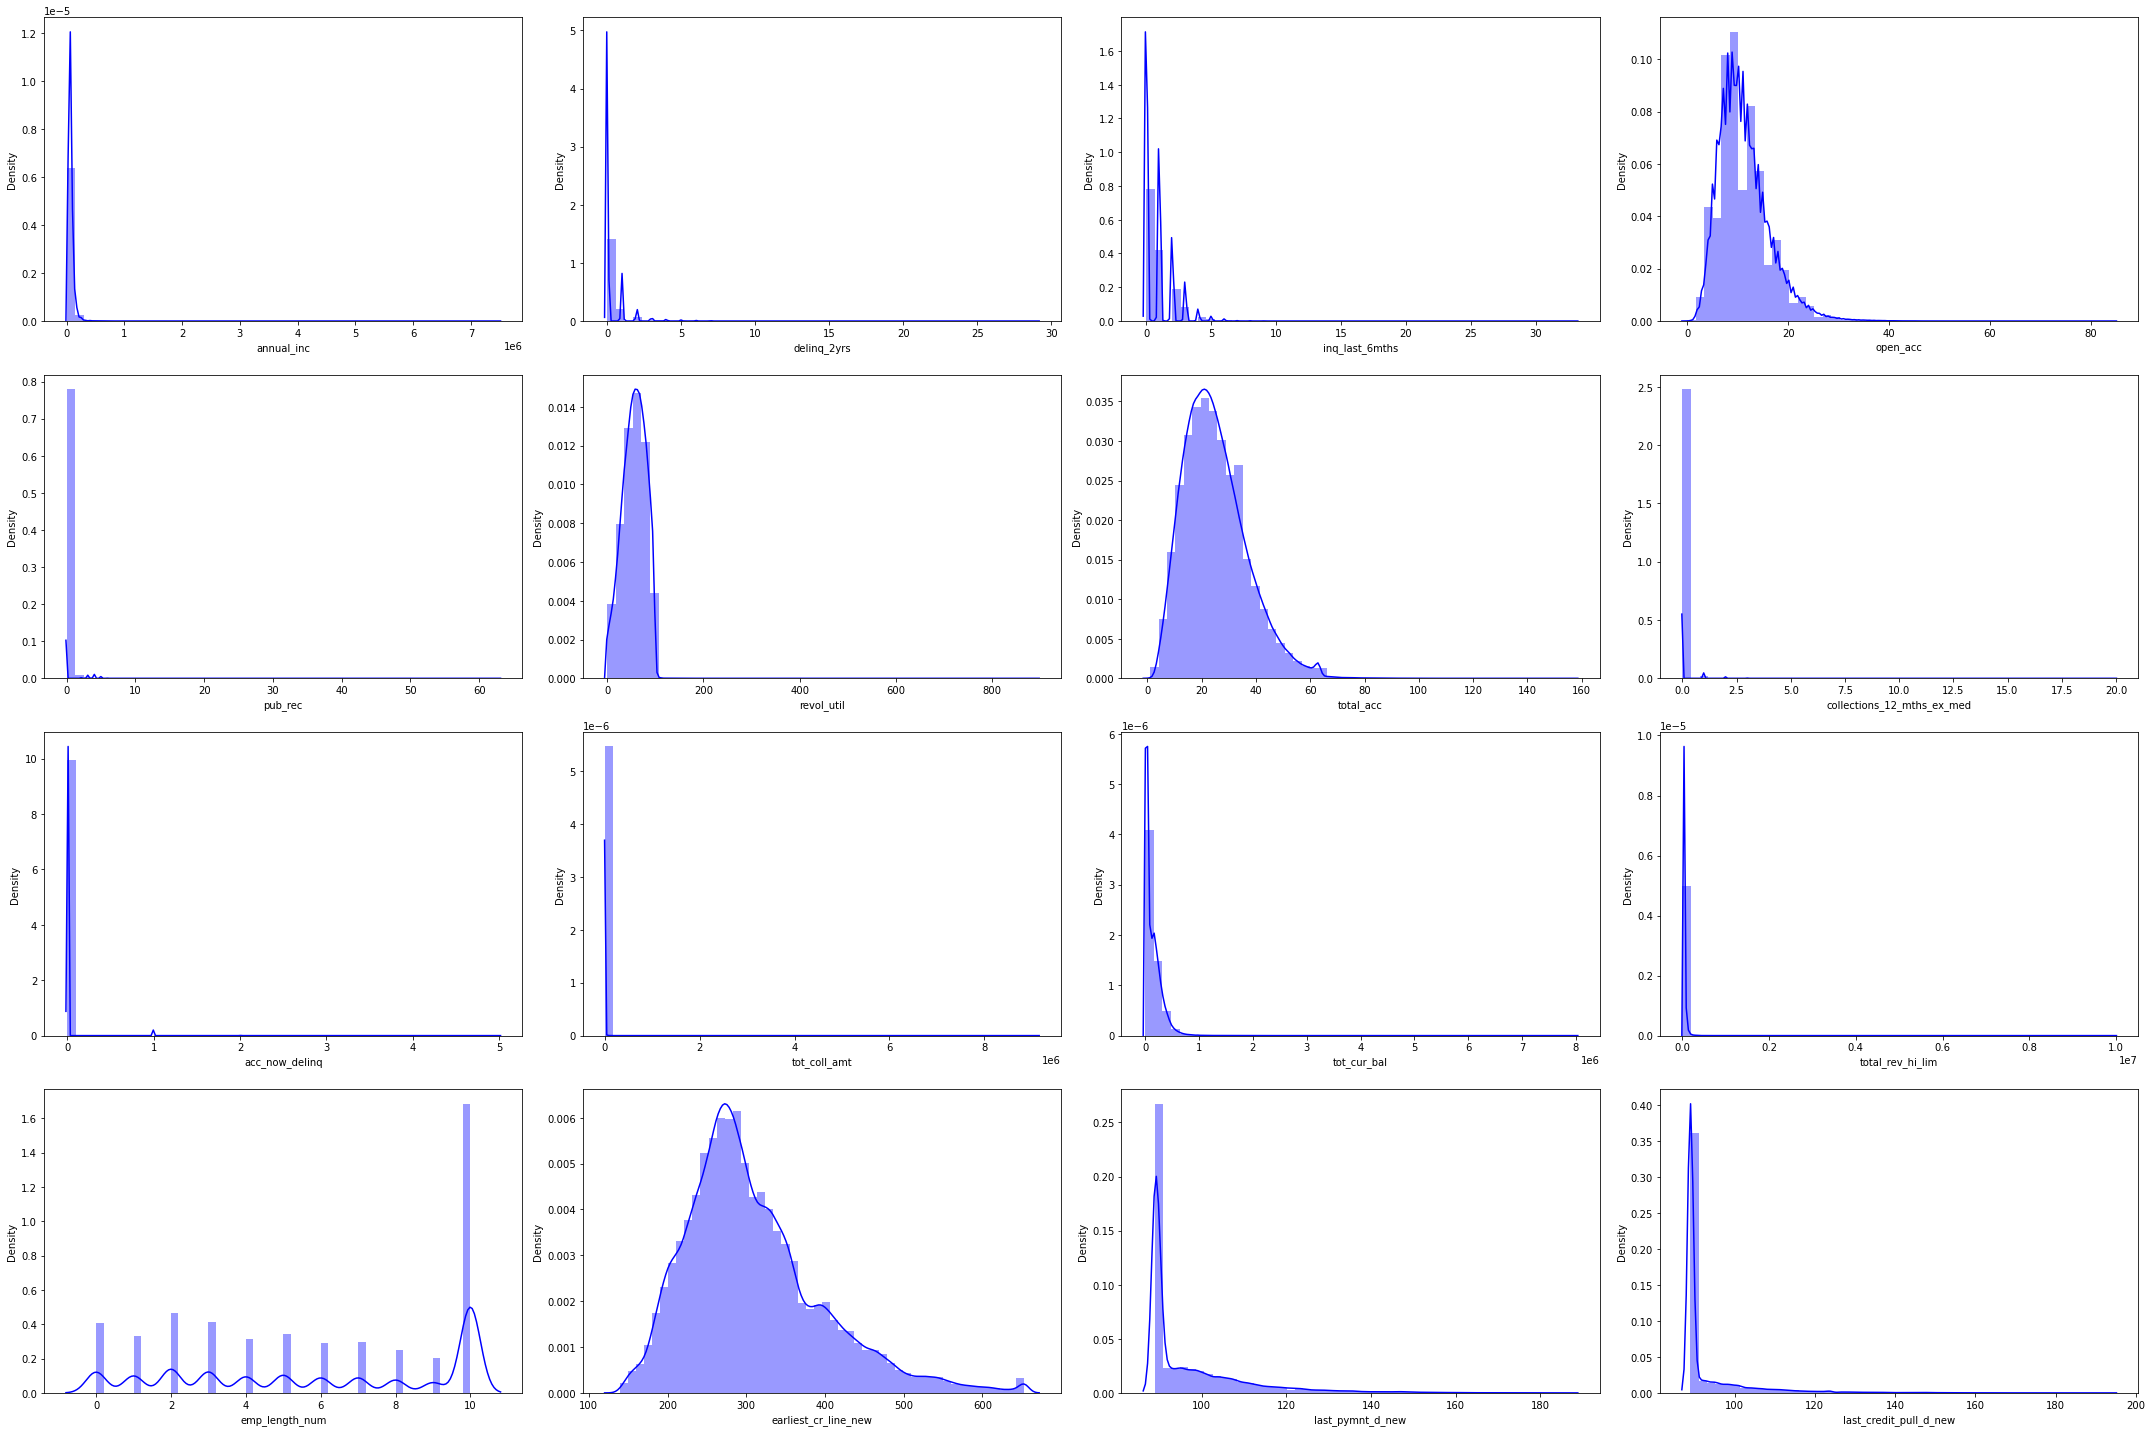

In [131]:
plt.figure(figsize=(30, 20))
for i,j in enumerate(col_num_miss):
    plt.subplot(4, 4, i+1)
    sns.distplot(num[j],color='blue')
    plt.tight_layout()

In [132]:
count_by_median =  ['open_acc', 'revol_util', 'total_acc', 'tot_cur_bal', 'earliest_cr_line_new', 'last_pymnt_d_new', 'last_credit_pull_d_new']
count_by_modus = ['annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'acc_now_delinq', 'tot_coll_amt', 'total_rev_hi_lim', 'emp_length_num', 'collections_12_mths_ex_med']

for i in count_by_median:
    data.loc[data.loc[:,i].isnull(),i] = data.loc[:,i].median()

for j in count_by_modus:
    data.loc[data.loc[:,j].isnull(),j] = data.loc[:,j].mode()[0]
    
data.isna().mean() * 100

loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
term                          0.0
int_rate                      0.0
installment                   0.0
grade                         0.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
purpose                       0.0
addr_state                    0.0
dti                           0.0
delinq_2yrs                   0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec                       0.0
revol_bal                     0.0
revol_util                    0.0
total_acc                     0.0
initial_list_status           0.0
out_prncp                     0.0
out_prncp_inv                 0.0
total_pymnt                   0.0
total_pymnt_inv               0.0
total_rec_prncp               0.0
total_rec_int                 0.0
total_rec_late_fee            0.0
recoveries                    0.0
collection_rec

In [133]:
from scipy import stats

num = data.select_dtypes(exclude='object')
cat = data.select_dtypes(include='object')

num = num[(np.abs(stats.zscore(num)) < 3).all(axis=1)]
data = num.join(cat)
data.shape

(357178, 42)

In [134]:
num = data.select_dtypes(exclude='object')
for j in num.columns:
    df = data[j]
    print('variable nunique for {} : {}'.format(j, df.nunique()))

variable nunique for loan_amnt : 1269
variable nunique for funded_amnt : 1270
variable nunique for funded_amnt_inv : 3863
variable nunique for term : 2
variable nunique for int_rate : 322
variable nunique for installment : 46350
variable nunique for annual_inc : 25242
variable nunique for dti : 3996
variable nunique for delinq_2yrs : 3
variable nunique for inq_last_6mths : 5
variable nunique for open_acc : 27
variable nunique for pub_rec : 2
variable nunique for revol_bal : 46425
variable nunique for revol_util : 1186
variable nunique for total_acc : 58
variable nunique for out_prncp : 112381
variable nunique for out_prncp_inv : 116563
variable nunique for total_pymnt : 270882
variable nunique for total_pymnt_inv : 268043
variable nunique for total_rec_prncp : 135507
variable nunique for total_rec_int : 214757
variable nunique for total_rec_late_fee : 905
variable nunique for recoveries : 10138
variable nunique for collection_recovery_fee : 9336
variable nunique for last_pymnt_amnt : 1

In [135]:
convert_col = ['term','pub_rec','delinq_2yrs','inq_last_6mths']

for i in convert_col:
    data[i] = data[i].astype(str)
    
data.drop(['collections_12_mths_ex_med', 'acc_now_delinq'], axis = 1, inplace =True)

# Exploratory Data Analysis

In [136]:
data.loc[data['status_loan_bad']==0,'status']='Success'
data.loc[data['status_loan_bad']==1,'status']='Failed'

num = data.select_dtypes(exclude='object')
cat = data.select_dtypes(include='object')

D:\Programming\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Programming\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Programming\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

D:\Programming\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Programming\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Programming\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

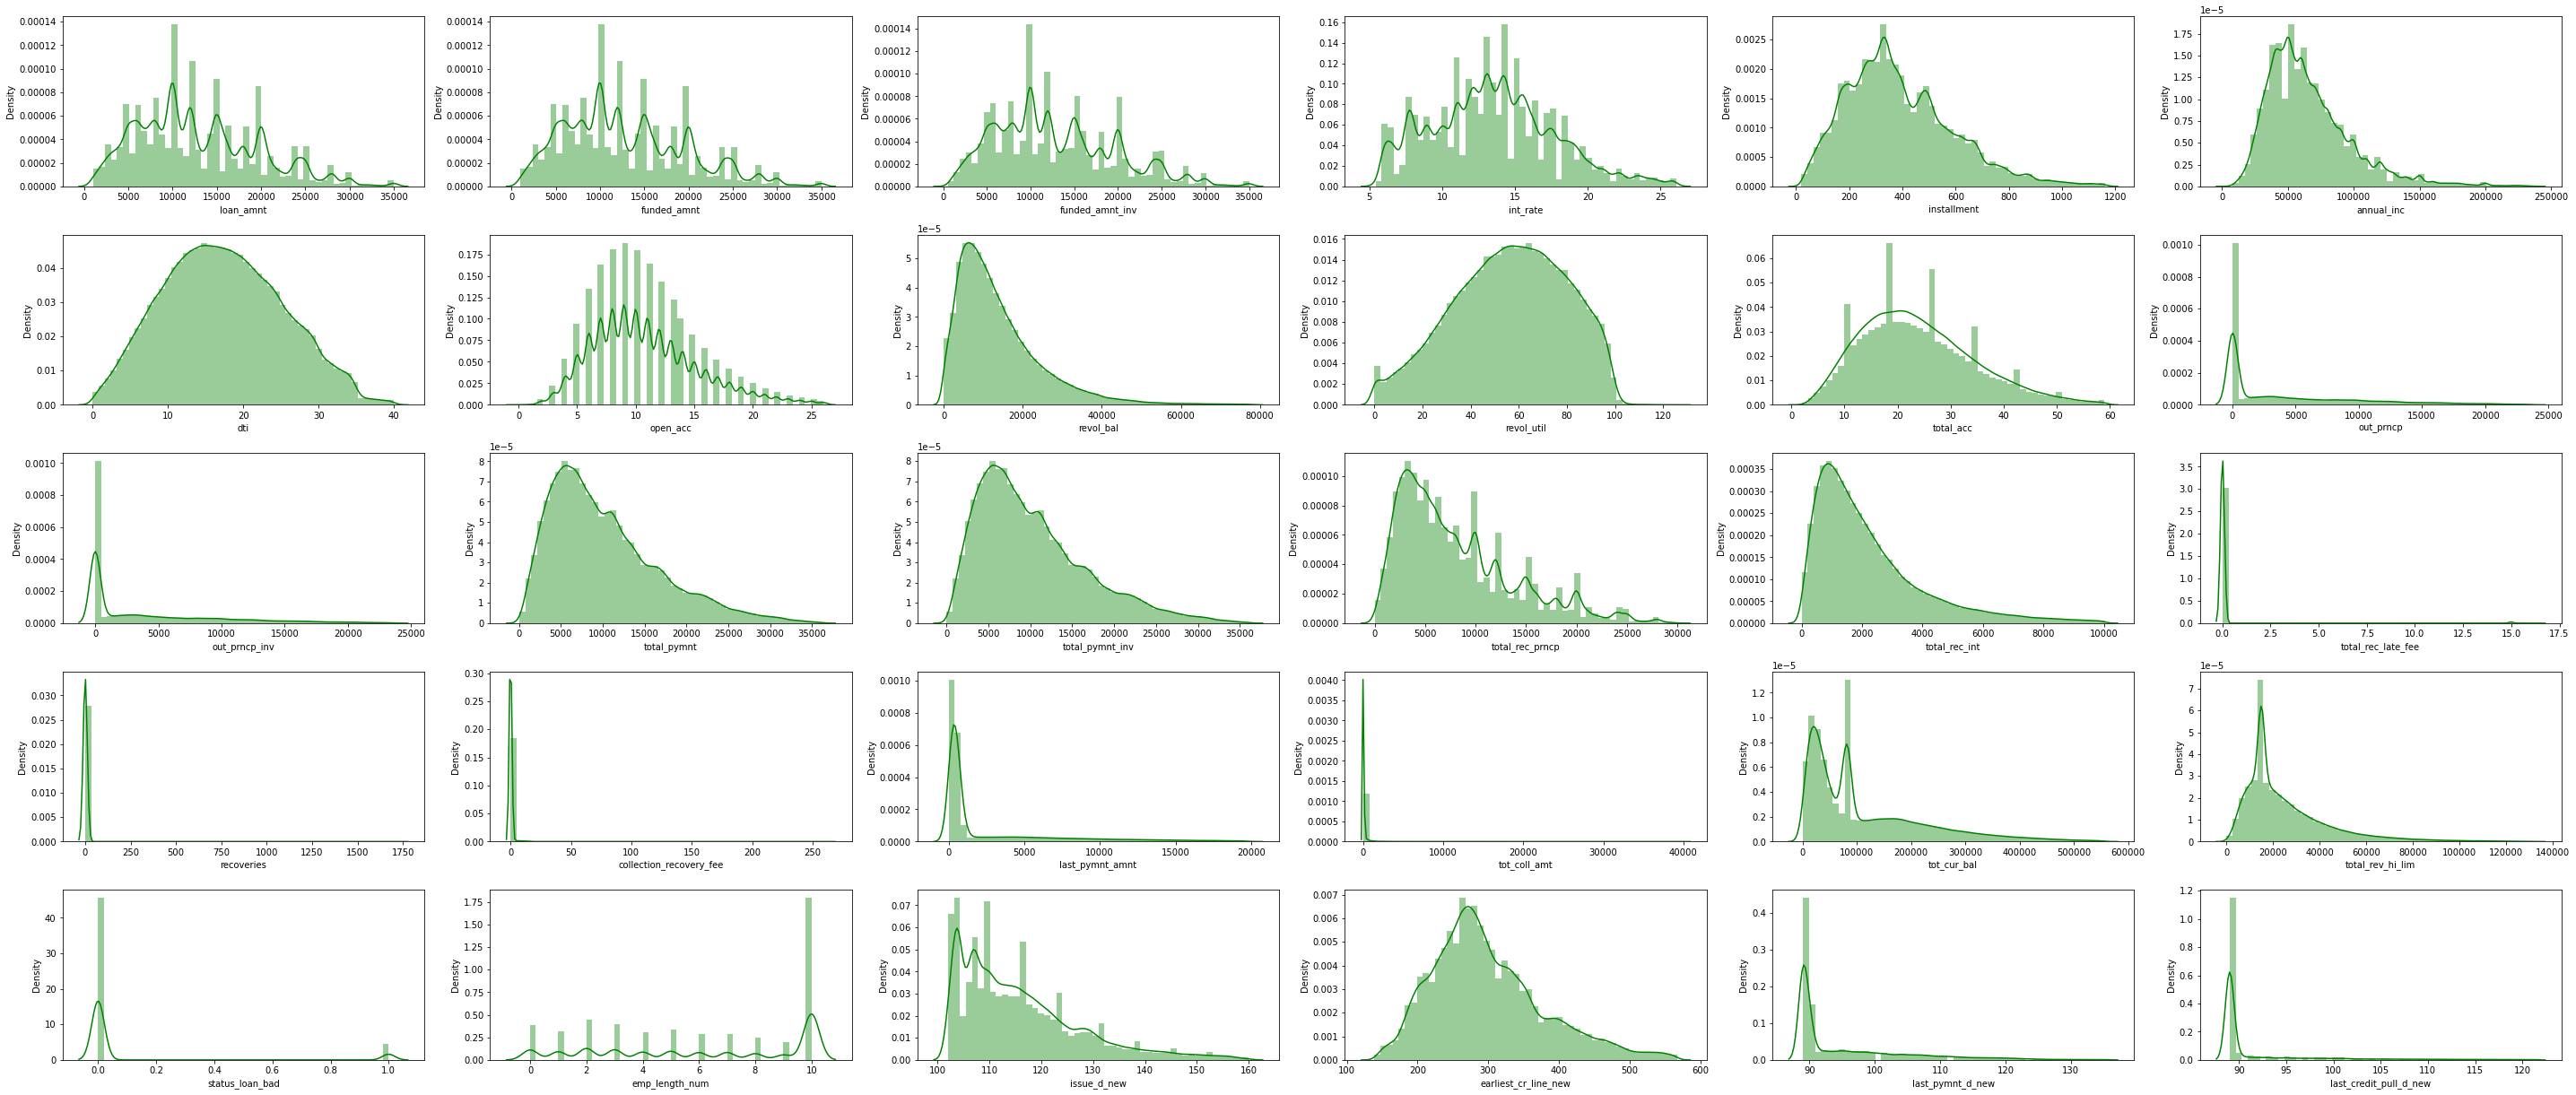

In [137]:
col = num.columns

plt.figure(figsize=(40,20))
for i in range(0, len(col)):
    plt.subplot(6, 6, i+1)
    sns.distplot(num[num.columns[i]],color='green')
    plt.tight_layout()

In [138]:
num.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,357178.0,12788.798232,6783.512118,1000.00,7600.0000,12000.000,17500.0000,35000.0000
funded_amnt,357178.0,12771.271327,6769.702473,1000.00,7575.0000,12000.000,17475.0000,35000.0000
funded_amnt_inv,357178.0,12757.886693,6764.234083,500.00,7550.0000,11975.000,17450.0000,35000.0000
int_rate,357178.0,13.469328,4.194683,5.42,10.4900,13.350,16.2000,26.0600
installment,357178.0,389.494158,199.823028,19.87,245.5100,354.315,505.3400,1162.4300
annual_inc,357178.0,65562.178160,31995.894778,3000.00,43000.0000,60000.000,80000.0000,238000.0000
dti,357178.0,17.383684,7.831606,0.00,11.5200,17.010,22.9500,39.9900
open_acc,357178.0,10.788920,4.463947,0.00,8.0000,10.000,13.0000,26.0000
revol_bal,357178.0,13852.593127,10723.989953,0.00,6291.0000,11121.000,18417.0000,78213.0000
revol_util,357178.0,56.348031,23.225216,0.00,39.8000,57.600,74.4000,125.8000


In [139]:
data['total_rec_late_fee_new'] = np.where(data['total_rec_late_fee']==0, 'Not Paid', 'Paid')
data['collection_recovery_fee_new'] = np.where(data['collection_recovery_fee']==0, 'Not Paid', 'Paid')
data['tot_coll_amt_new'] = np.where(data['tot_coll_amt']==0, 'Not Paid', 'Paid')
data['recoveries_new'] = np.where(data['recoveries']==0, 'Not Paid', 'Paid')

In [140]:
data.drop(['total_rec_late_fee','recoveries','collection_recovery_fee','tot_coll_amt'], axis=1, inplace=True)

D:\Programming\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Programming\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Programming\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Programming\Anaconda\lib\site-p

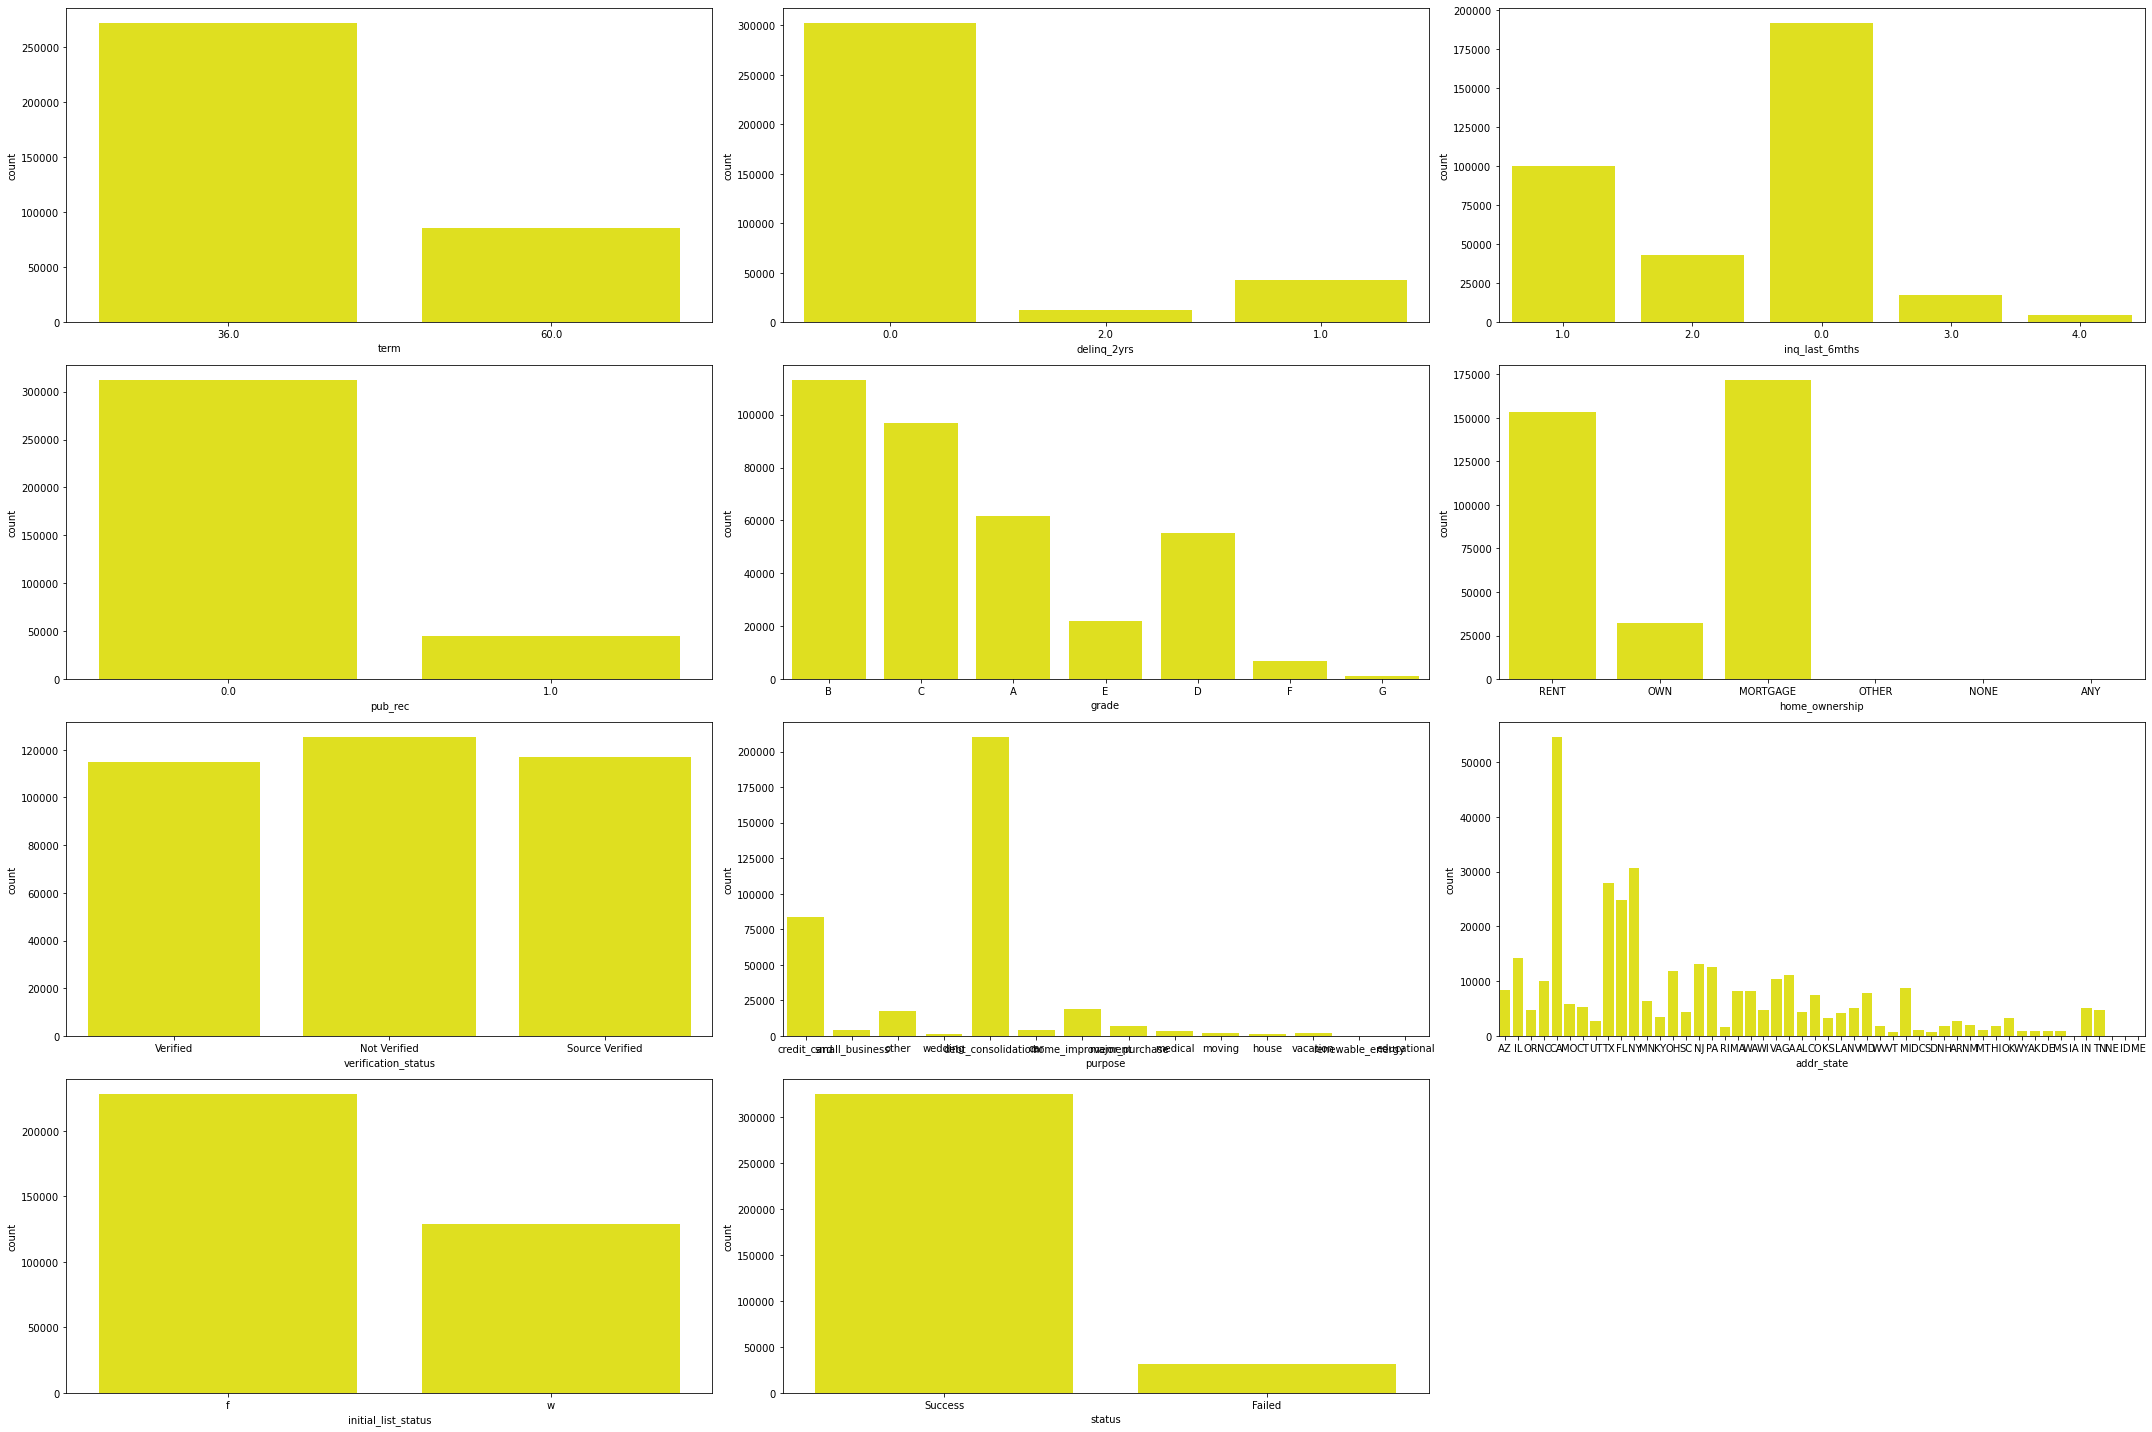

In [141]:
col = cat.columns

plt.figure(figsize=(30, 20))
for i in range(0, len(col)):
    plt.subplot(4, 3, i+1)
    sns.countplot(cat[cat.columns[i]],color='yellow')
    plt.tight_layout()

In [142]:
data['home_ownership'].replace({'NONE':'RENT', 'ANY':'RENT', 'OTHER':'RENT'},inplace=True)

data['purpose'].replace({'educational':'major_purchase',
                         'house':'major_purchase',
                         'medical':'major_purchase',
                         'moving':'major_purchase',
                         'vacation':'other',
                         'wedding':'other',
                         'renewable_energy':'home_improvement'},inplace=True)

data['addr_state'].replace({'IA':'OTHER', 'ID':'OTHER', 'NE':'OTHER', 'ME':'OTHER'},inplace=True)

UNIVARIAT

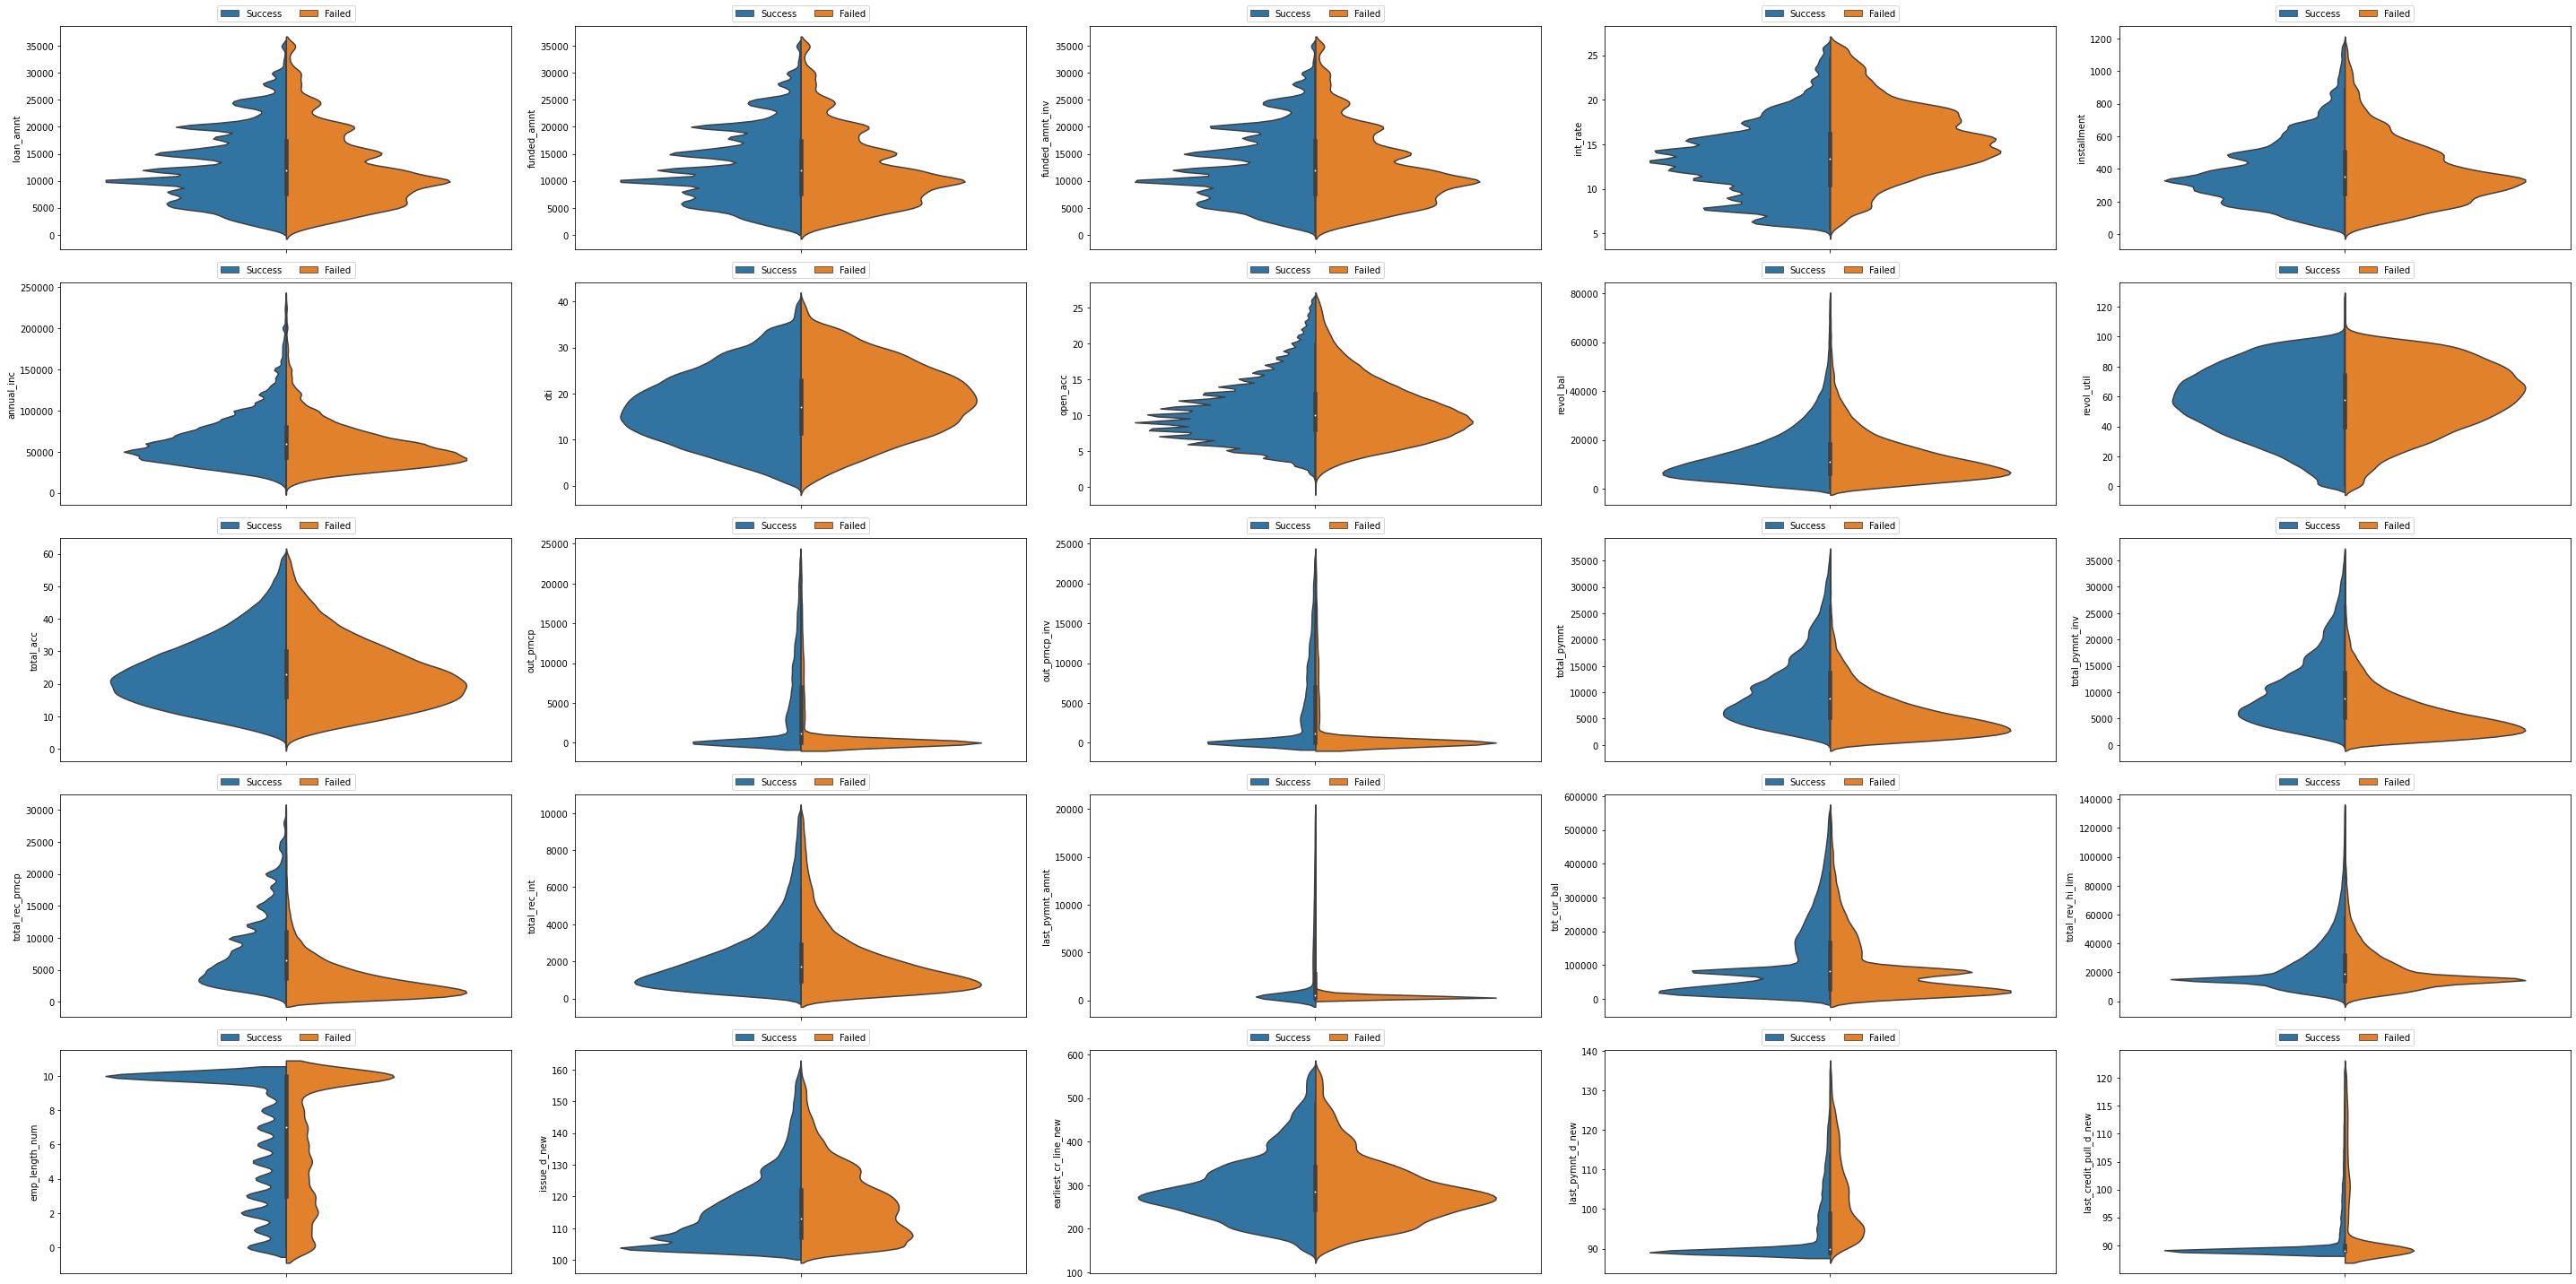

In [144]:
num = data.select_dtypes(exclude='object').drop('status_loan_bad',axis=1)
col = num.columns
data["all"] = ""

plt.figure(figsize=(40, 20))
for i,j in enumerate(col):
    plt.subplot(5, 5, i+1)
    sns.violinplot(x="all", y=j, hue="status", data=data, split=True)
    plt.xlabel("")
    plt.legend(loc="lower center", bbox_to_anchor=(0.5, 1), ncol=2)
    plt.tight_layout()

data.drop('all', axis = 1, inplace = True)

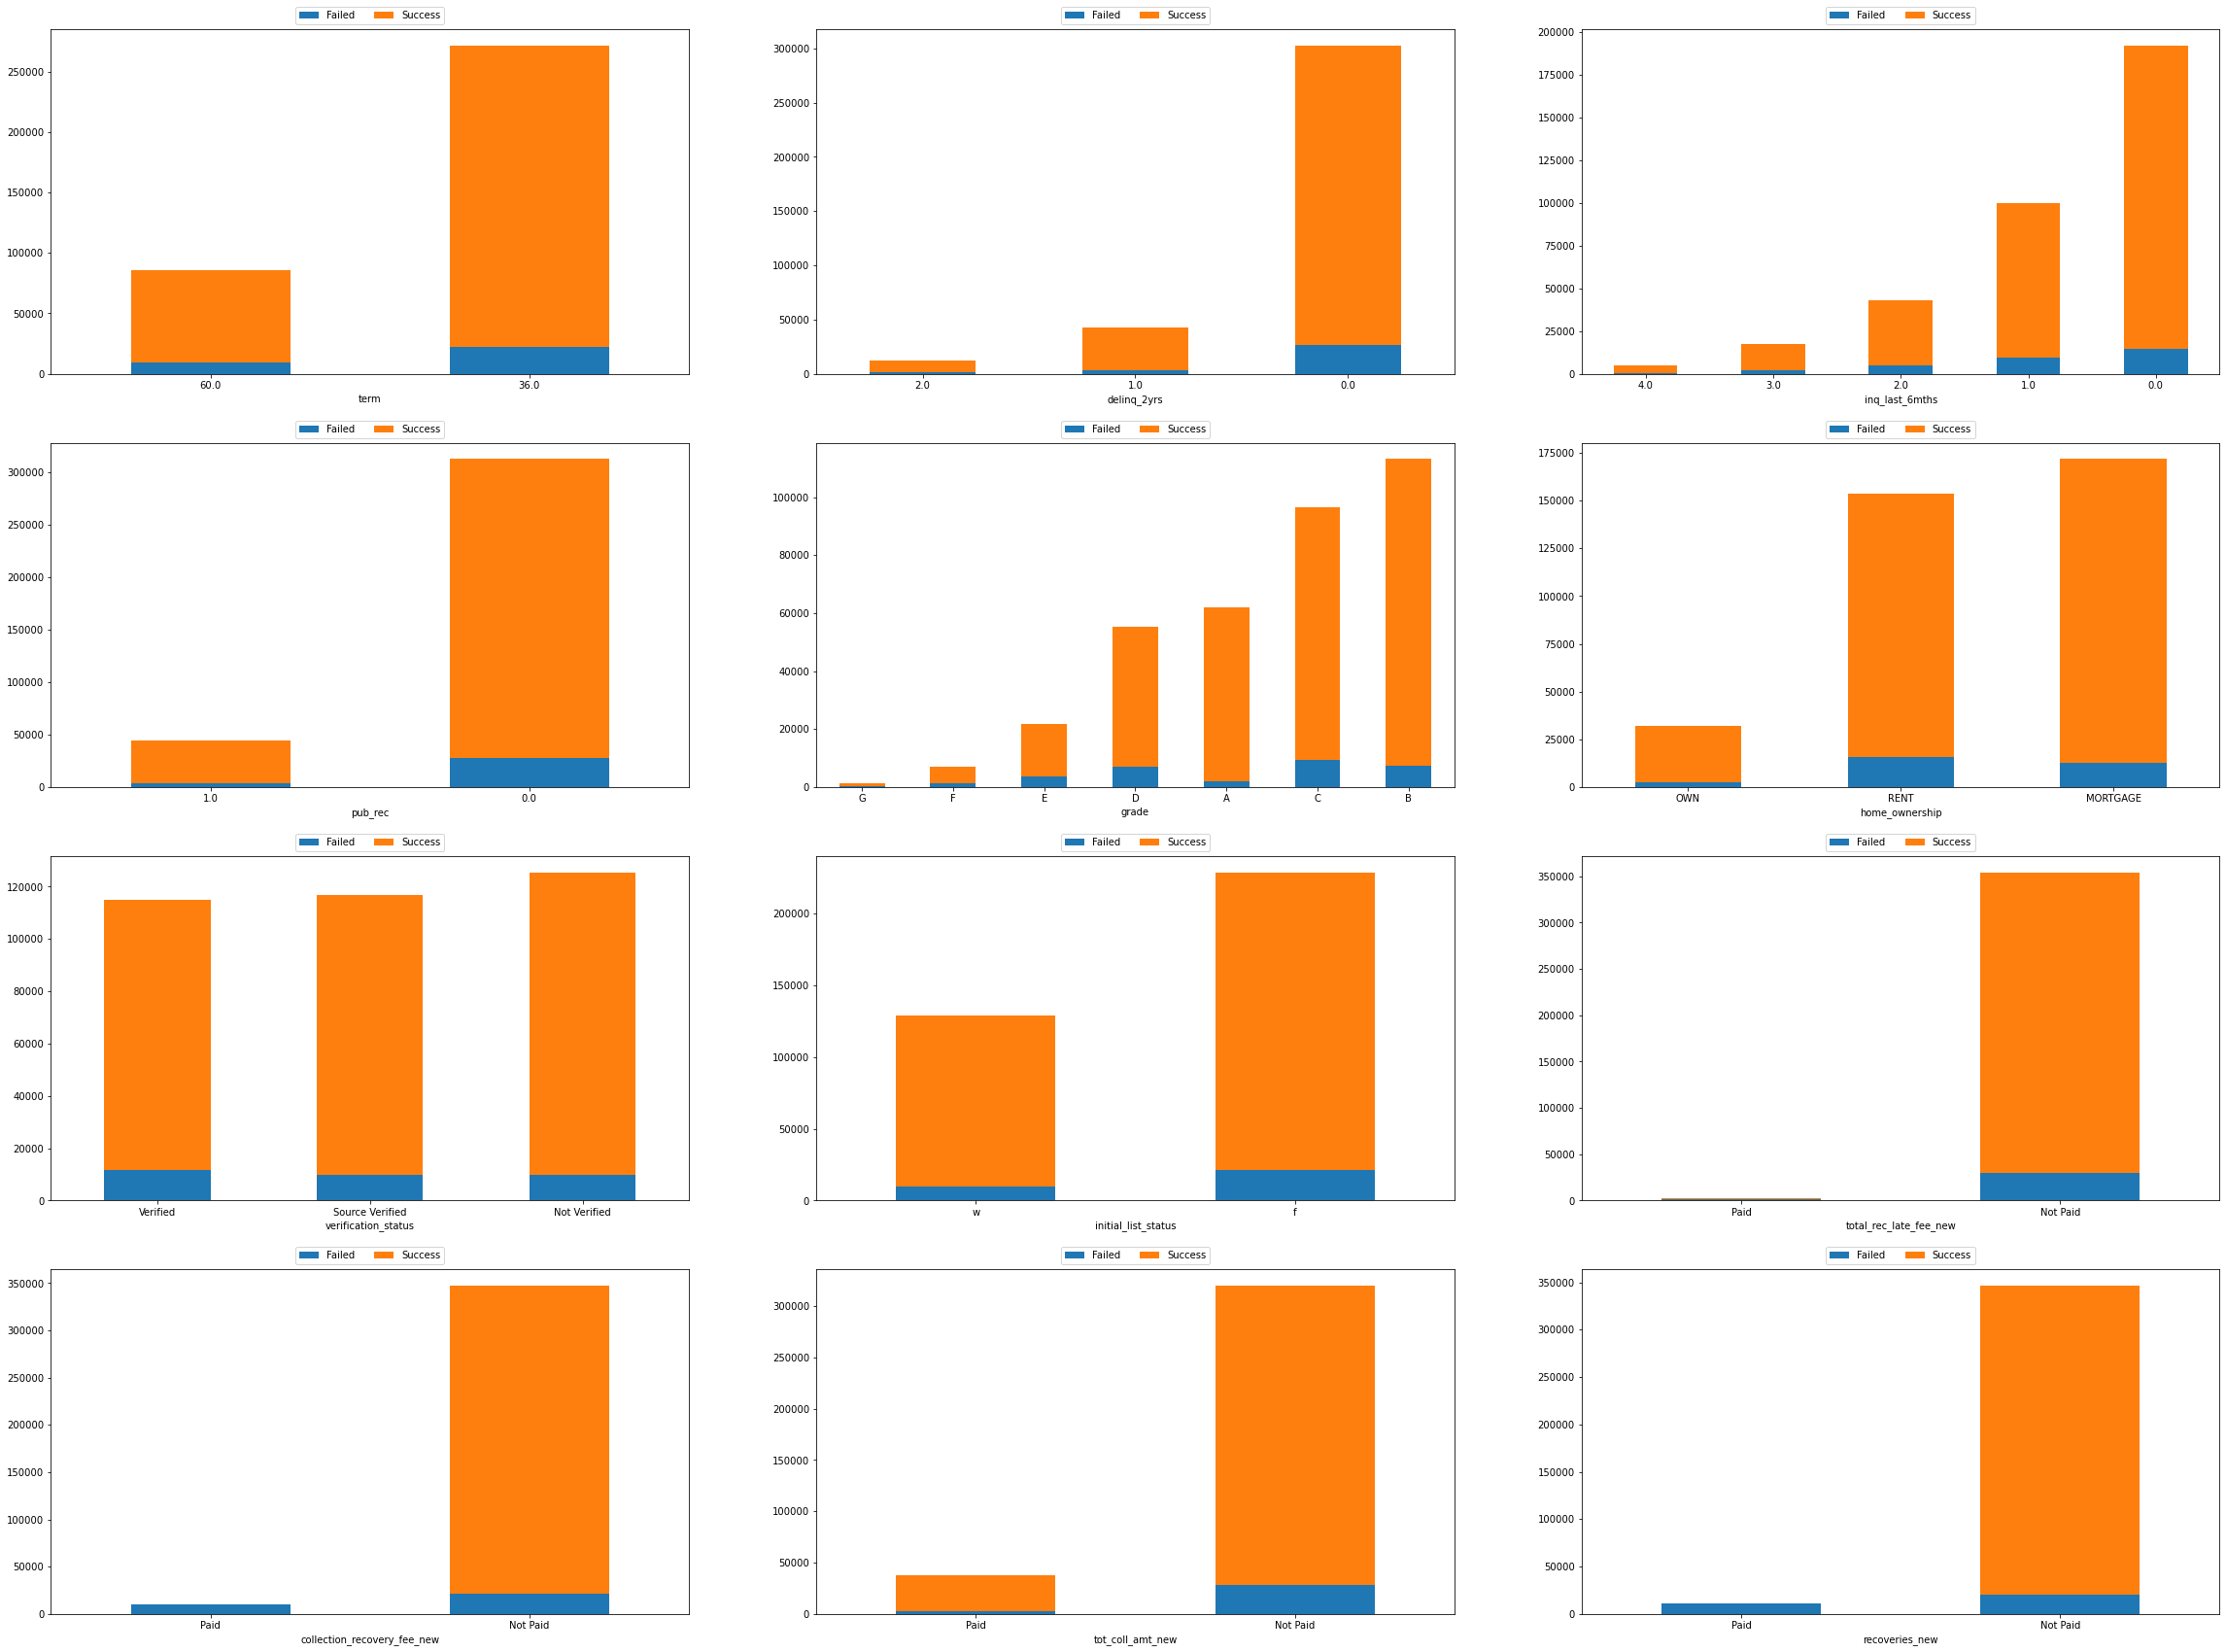

In [146]:
cat = data.select_dtypes(include='object').drop(['status','purpose','addr_state'],axis=1)
col = cat.columns

fig = plt.figure(figsize=(40, 30))
for i,j in enumerate(col, start=1):
    ax = plt.subplot(4, 3, i)
    pd.crosstab(data[j], data['status']).sort_values(by=['Success']).plot.bar(stacked=True,ax=ax)
    plt.legend(loc="lower center", bbox_to_anchor=(0.5, 1), ncol=2)
    plt.xticks(rotation='0')

In [147]:
data.drop('collection_recovery_fee_new', axis=1, inplace=True)

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

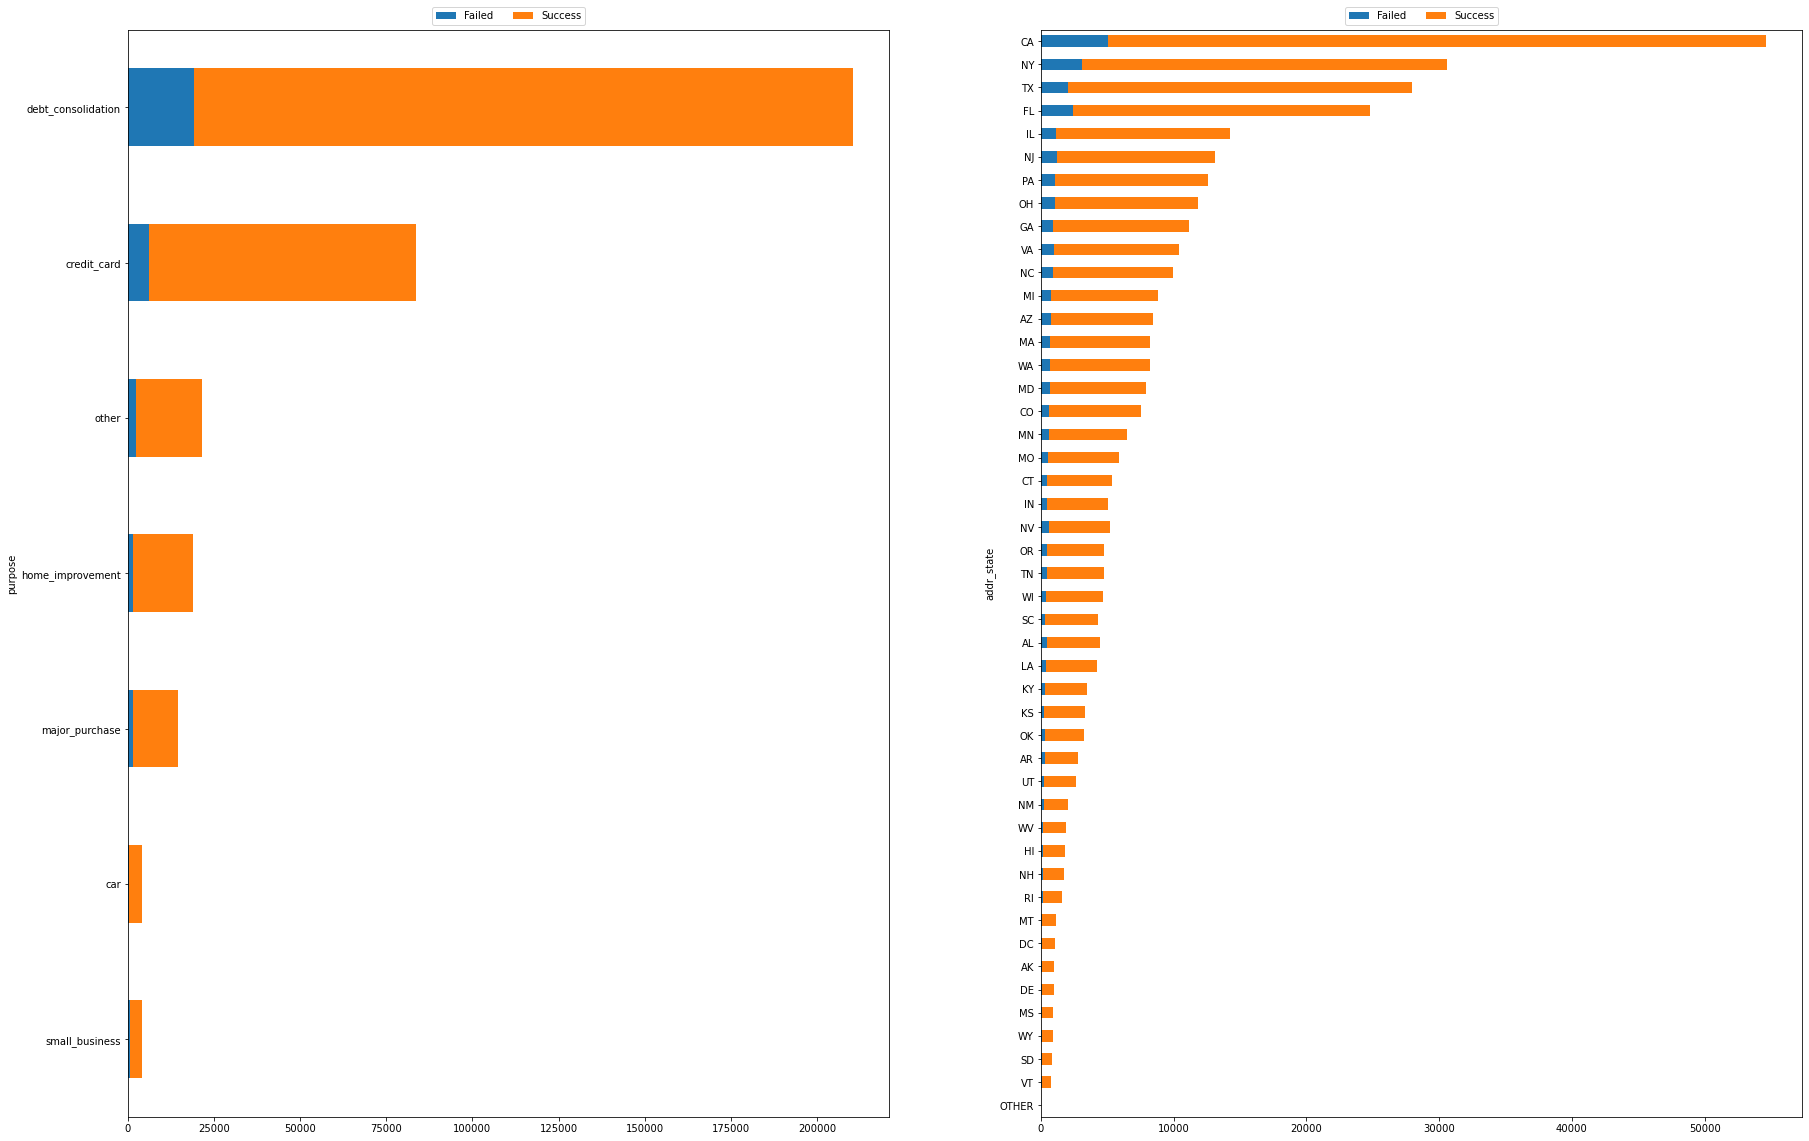

In [148]:
fig = plt.figure(figsize=(30, 20))
ax = plt.subplot(121)
pd.crosstab(data['purpose'], data['status']).sort_values(by=['Success']).plot.barh(stacked=True,ax=ax)
plt.legend(loc="lower center", bbox_to_anchor=(0.5, 1), ncol=2)
plt.xticks(rotation='0')

ax = plt.subplot(122)
pd.crosstab(data['addr_state'], data['status']).sort_values(by=['Success']).plot.barh(stacked=True,ax=ax)
plt.legend(loc="lower center", bbox_to_anchor=(0.5, 1), ncol=2)
plt.xticks(rotation='0')

In [ ]:
BIVARIAT

Anova Test

In [149]:
x = data.select_dtypes(exclude='object').drop('status_loan_bad',axis=1)
y = data['status']
num_col = x.columns

from sklearn.feature_selection import f_classif
f_value, p_value = f_classif(x,y)
for i,j in enumerate(num_col): 
    print('p value variable for {} = {}'.format(j, round(p_value[i], 3)))

p value variable for loan_amnt = 0.0
p value variable for funded_amnt = 0.0
p value variable for funded_amnt_inv = 0.0
p value variable for int_rate = 0.0
p value variable for installment = 0.0
p value variable for annual_inc = 0.0
p value variable for dti = 0.0
p value variable for open_acc = 0.021
p value variable for revol_bal = 0.0
p value variable for revol_util = 0.0
p value variable for total_acc = 0.0
p value variable for out_prncp = 0.0
p value variable for out_prncp_inv = 0.0
p value variable for total_pymnt = 0.0
p value variable for total_pymnt_inv = 0.0
p value variable for total_rec_prncp = 0.0
p value variable for total_rec_int = 0.0
p value variable for last_pymnt_amnt = 0.0
p value variable for tot_cur_bal = 0.0
p value variable for total_rev_hi_lim = 0.0
p value variable for emp_length_num = 0.0
p value variable for issue_d_new = 0.0
p value variable for earliest_cr_line_new = 0.0
p value variable for last_pymnt_d_new = 0.0
p value variable for last_credit_pull_d_new 

Chi Square Test

In [150]:
x = data.select_dtypes(include='object').drop('status',axis=1)
y = data['status']
cat_col = x.columns

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
for i in cat_col:
    cat_x = LabelEncoder().fit_transform(data[i]).reshape(-1,1)
    f_value, p_value = chi2(cat_x,y)
    print('p value variable for {} = {}'.format(i, p_value))
    #print(i, p_value)

p value variable for term = [1.70539657e-82]
p value variable for delinq_2yrs = [0.00314459]
p value variable for inq_last_6mths = [4.91389461e-299]
p value variable for pub_rec = [0.06204416]
p value variable for grade = [0.]
p value variable for home_ownership = [4.70518872e-172]
p value variable for verification_status = [2.07096688e-59]
p value variable for purpose = [1.66919021e-58]
p value variable for addr_state = [3.17195947e-42]
p value variable for initial_list_status = [9.99677159e-44]
p value variable for total_rec_late_fee_new = [0.]
p value variable for tot_coll_amt_new = [0.0003353]
p value variable for recoveries_new = [0.]


In [151]:
data.drop(['pub_rec'], axis=1, inplace=True)

MULTIVARIAT

C:\Users\HP\AppData\Local\Temp/ipykernel_19956/1044575095.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(kor_label, dtype=np.bool)


<AxesSubplot:>

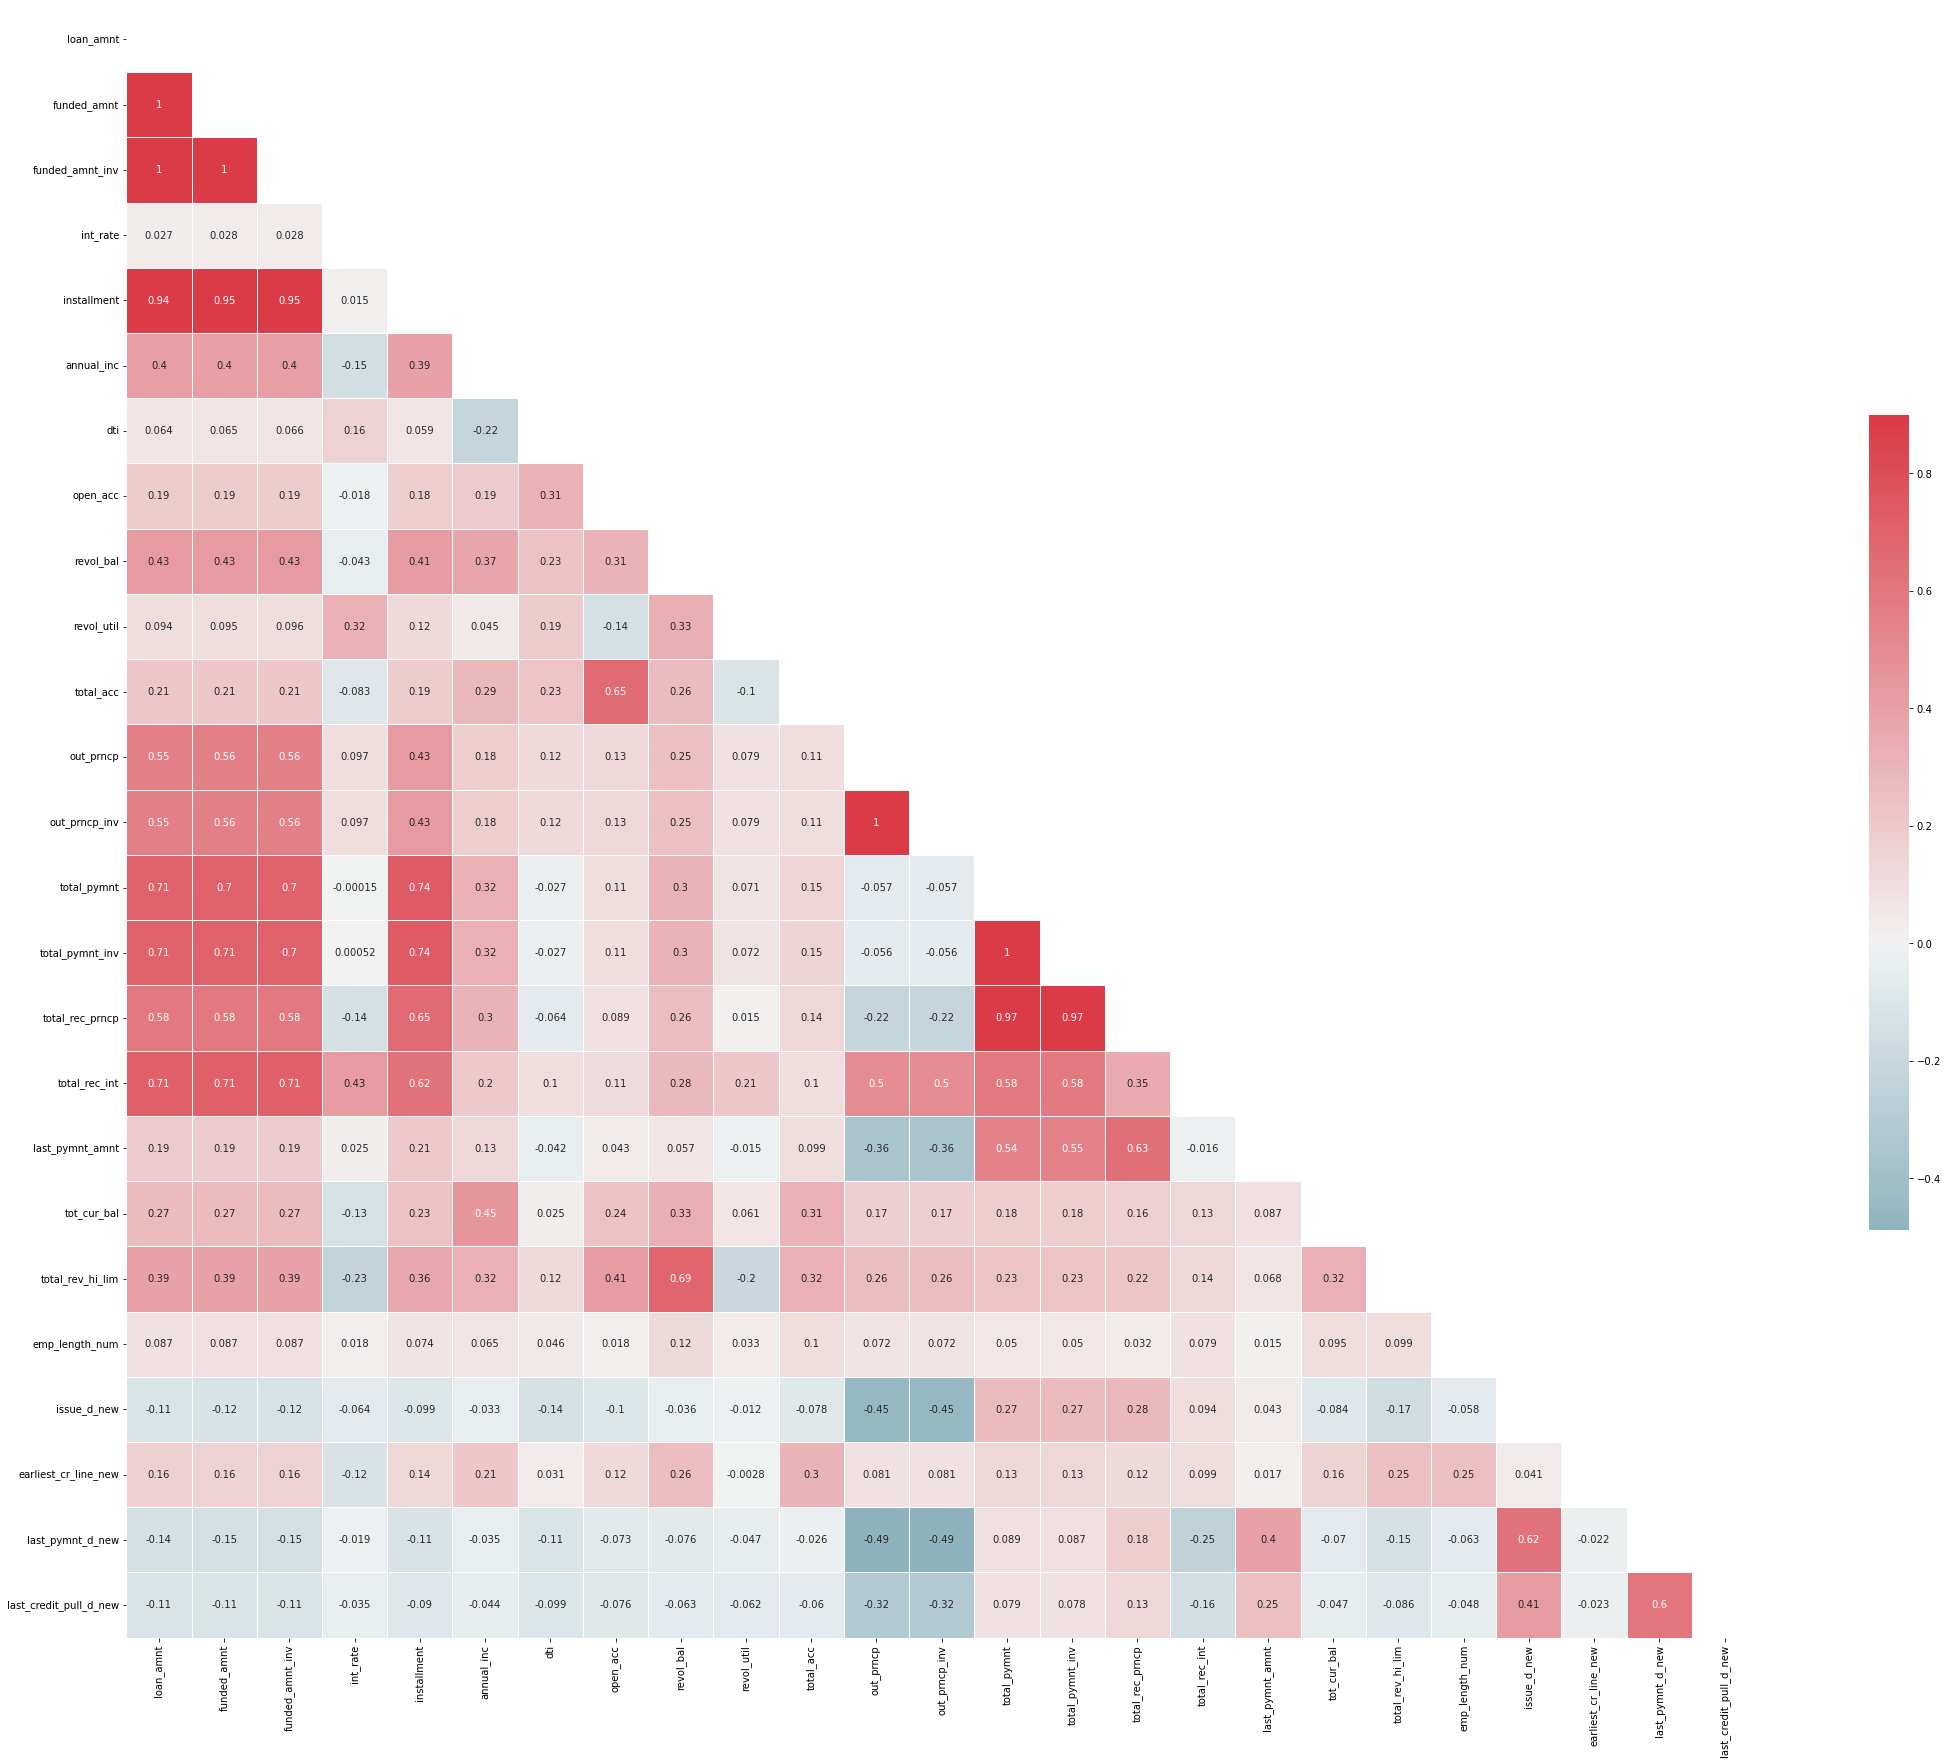

In [155]:
df = data.select_dtypes(exclude='object').drop('status_loan_bad',axis=1)

kor_label = df.corr()
mask = np.zeros_like(kor_label, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(40, 30))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0, annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [157]:
matrix_kor = data.corr().abs()
upper = matrix_kor.where(np.triu(np.ones(matrix_kor.shape), k=1).astype(np.bool))
kor_up = [column for column in upper.columns if any(upper[column] > 0.7)]
kor_up

C:\Users\HP\AppData\Local\Temp/ipykernel_19956/1591967079.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = matrix_kor.where(np.triu(np.ones(matrix_kor.shape), k=1).astype(np.bool))


['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int']

In [159]:
data.drop(kor_up, axis=1, inplace=True)

# Data Preprocessing

Label Encoding

In [160]:
data['grade'] = data['grade'].astype('category').cat.codes

One Hot Encoding

In [161]:
cat = data.select_dtypes(include='object').drop('status',axis=1)
cat_col = cat.columns.tolist()

one_hot = pd.get_dummies(data[cat_col], drop_first=True)
cath = pd.concat([one_hot, data['grade']],axis=1)

Data Partition

In [162]:
from sklearn.model_selection import train_test_split

num = data.select_dtypes(exclude='object')
data_set = pd.concat([num, cath],axis=1)

X = data_set.drop('status_loan_bad', axis = 1)
y = data_set['status_loan_bad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Transformation

In [164]:
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer

min_max = ['dti', 'open_acc', 'revol_util', 'total_acc', 'earliest_cr_line_new']
log_col = ['loan_amnt', 'int_rate', 'annual_inc', 'revol_bal', 'out_prncp', 'last_pymnt_amnt',
           'tot_cur_bal', 'total_rev_hi_lim', 'emp_length_num', 'issue_d_new',
           'last_pymnt_d_new', 'last_credit_pull_d_new']

min_max_SC = MinMaxScaler()
X_train.loc[:, min_max] = min_max_SC.fit_transform(X_train.loc[:, min_max])
X_test.loc[:, min_max] = min_max_SC.transform(X_test.loc[:, min_max])

X_train.loc[:, log_col] = np.log1p(X_train.loc[:, log_col])
X_test.loc[:, log_col] = np.log1p(X_test.loc[:, log_col])

Balance Target

In [165]:
y_train.value_counts()

0    260668
1     25074
Name: status_loan_bad, dtype: int64

In [169]:
pip install --upgrade scikit-learn

  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.3
    Uninstalling scikit-learn-1.1.3:
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'd:\\programming\\anaconda\\lib\\site-packages\\sklearn\\_isotonic.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [171]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

under_sampler = RandomOverSampler(random_state=123)

X_resampled, y_resampled = under_sampler.fit_resample(X_train.values, y_train.ravel())
Counter(y_resampled)

Counter({0: 260668, 1: 260668})

In [172]:
count_col = X_train.columns.to_list()

X_train = pd.DataFrame(X_resampled, 
             columns = count_col)

y_train = pd.Series(y_resampled)

# Training ML

Compare Algorithm

In [173]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_train)
y_pred_random_forest_test = random_forest.predict(X_test)

logis_regres = LogisticRegression()
logis_regres.fit(X_train, y_train)
y_pred_logis_regres = logis_regres.predict(X_train)
y_pred_logis_regres_test = logis_regres.predict(X_test)

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_train)
y_pred_decision_tree_test = decision_tree.predict(X_test)

D:\Programming\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [174]:
from sklearn.metrics import accuracy_score

machine_learning = ['RandomForest','LogisticRegression', 'DecisionTree']
data_train_predict = [y_pred_random_forest, y_pred_logis_regres, y_pred_decision_tree]
data_test_predict = [y_pred_random_forest_test, y_pred_logis_regres_test, y_pred_decision_tree_test]

train_accuracy = []
test_accuracy = []

for i in data_train_predict:
    train_accuracy.append(accuracy_score(y_train, i))

for i in data_test_predict:
    test_accuracy.append(accuracy_score(y_test, i))

n = list(zip(machine_learning, train_accuracy, test_accuracy))
pd.DataFrame(n, columns = ['Model','Train Accuracy', 'Test Accuracy']).sort_values(['Train Accuracy'],ascending=False)

,Model,Train Accuracy,Test Accuracy
0,RandomForest,1.000000,0.988745
2,DecisionTree,1.000000,0.984532
1,LogisticRegression,0.887487,0.930693


<AxesSubplot:title={'center':'Priority Feature On Random Forest'}>

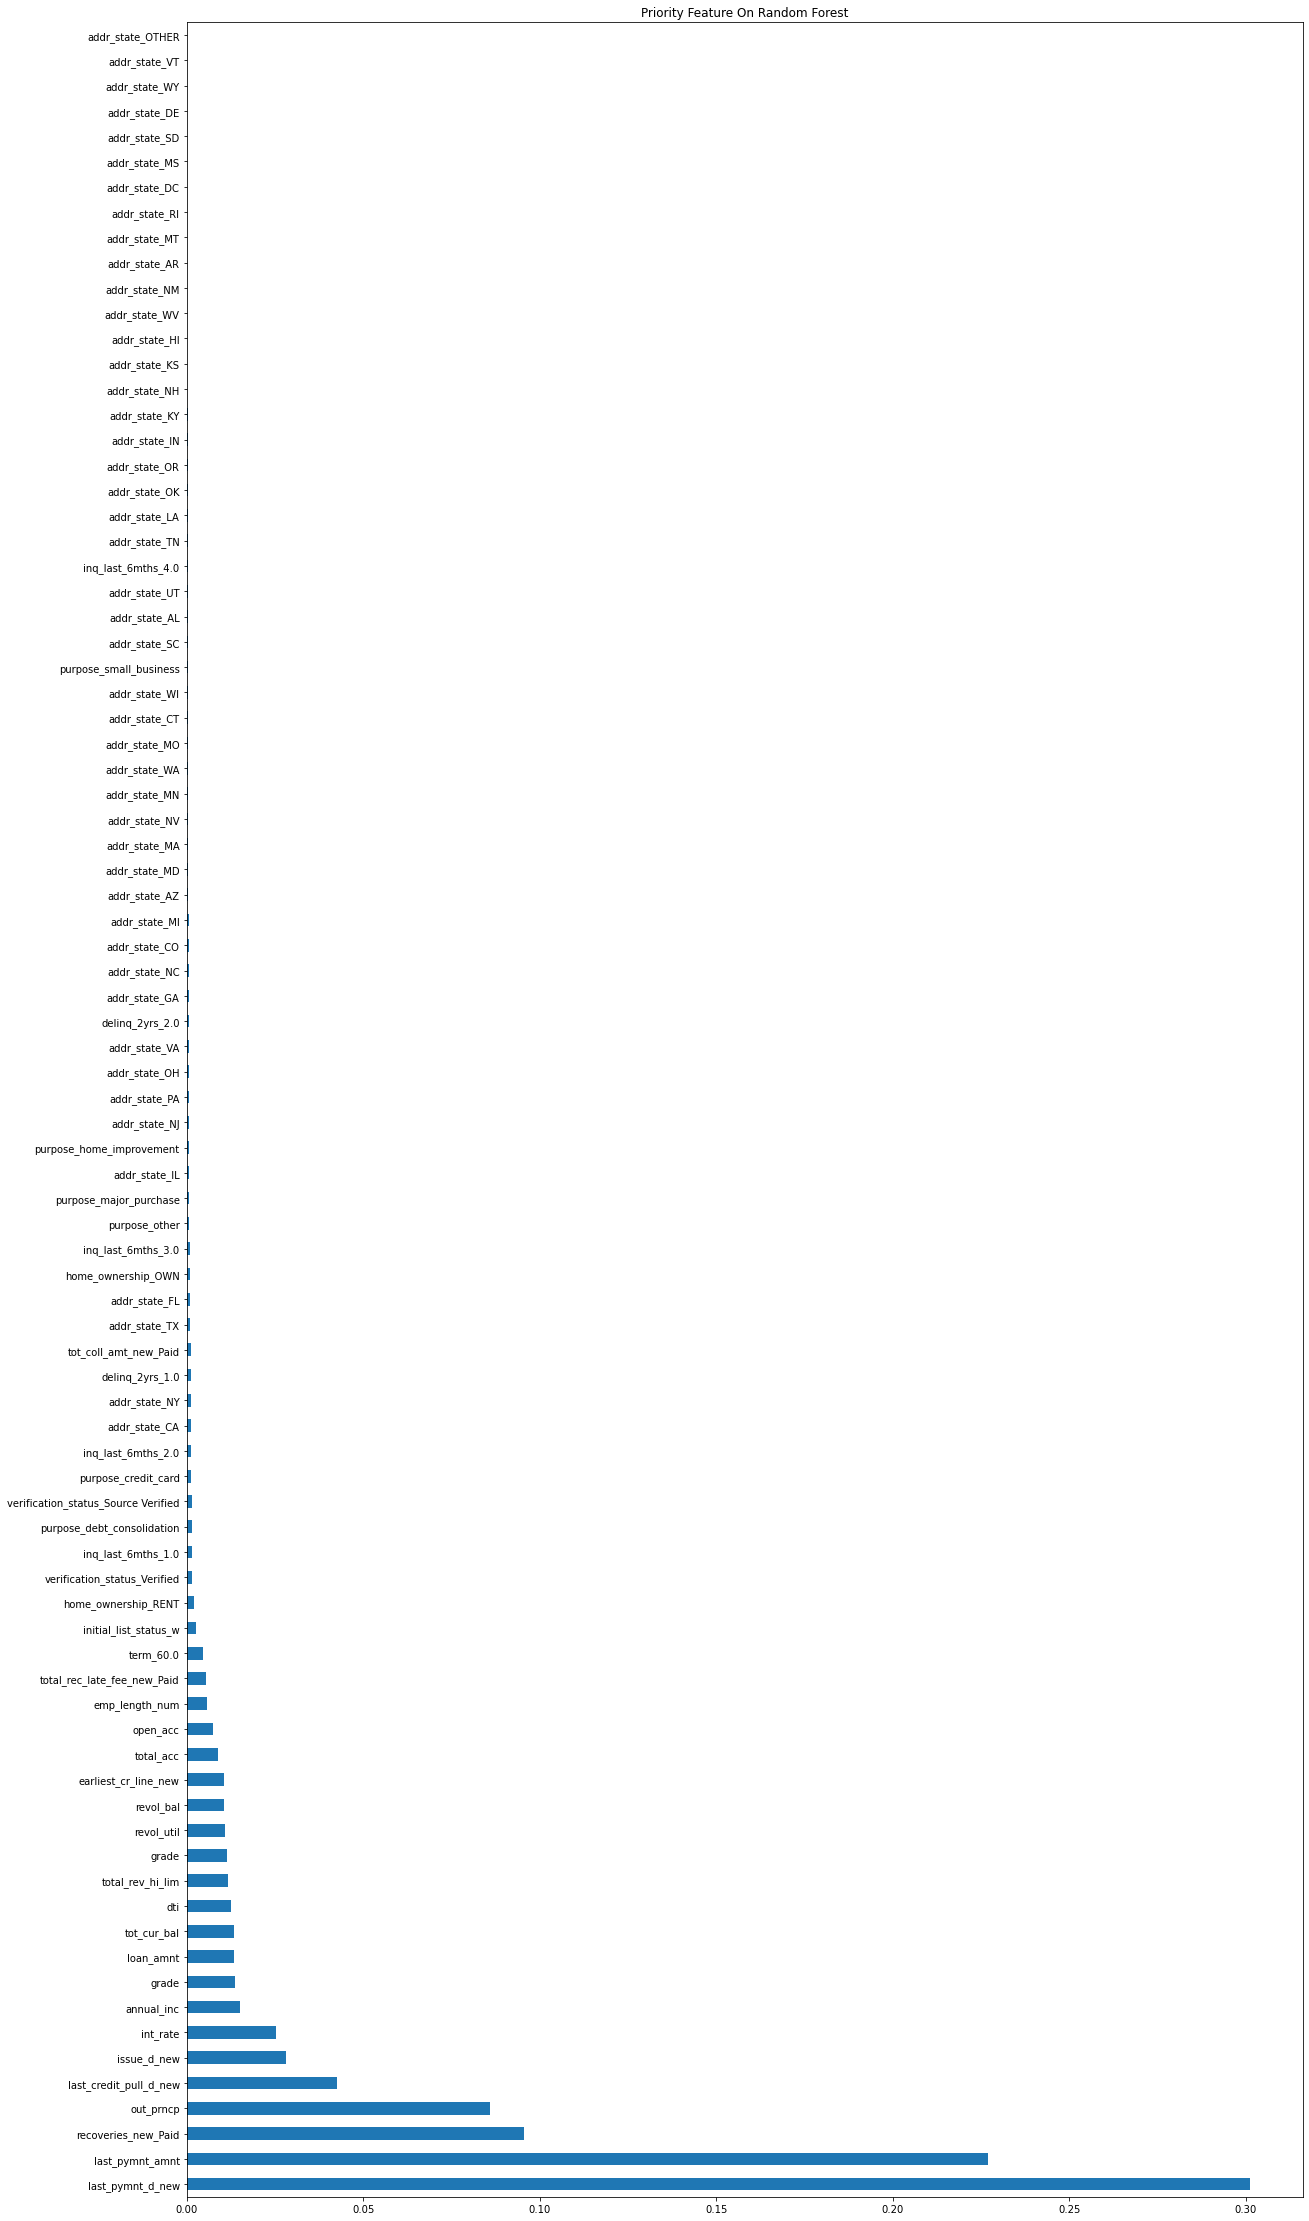

In [175]:
feature = pd.Series(random_forest.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(20, 40))
feature.plot(kind='barh', title='Priority Feature On Random Forest')

In [176]:
X_train.columns

Index(['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'open_acc', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'last_pymnt_amnt',
       'tot_cur_bal', 'total_rev_hi_lim', 'emp_length_num', 'issue_d_new',
       'earliest_cr_line_new', 'last_pymnt_d_new', 'last_credit_pull_d_new',
       'grade', 'term_60.0', 'delinq_2yrs_1.0', 'delinq_2yrs_2.0',
       'inq_last_6mths_1.0', 'inq_last_6mths_2.0', 'inq_last_6mths_3.0',
       'inq_last_6mths_4.0', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_home_improvement', 'purpose_major_purchase', 'purpose_other',
       'purpose_small_business', 'addr_state_AL', 'addr_state_AR',
       'addr_state_AZ', 'addr_state_CA', 'addr_state_CO', 'addr_state_CT',
       'addr_state_DC', 'addr_state_DE', 'addr_state_FL', 'addr_state_GA',
       'addr_state_HI', 'addr_state_IL', 'addr_state_IN',

In [177]:
new_col = ['last_pymnt_d_new','last_pymnt_amnt','recoveries_new_Paid','out_prncp','last_credit_pull_d_new','issue_d_new',
       'int_rate','annual_inc','loan_amnt','grade','tot_cur_bal','dti','total_rev_hi_lim','revol_bal','revol_util','earliest_cr_line_new',
       'total_acc','open_acc','emp_length_num','total_rec_late_fee_new_Paid','term_60.0','initial_list_status_w','home_ownership_RENT']

Overfitting Check

In [178]:
X_train_2 = X_train[new_col]
X_test_2 = X_test[new_col]

random_forest = RandomForestClassifier()
random_forest.fit(X_train_2, y_train)
y_pred_random_forest = random_forest.predict(X_train_2)
y_pred_random_forest_test = random_forest.predict(X_test_2)

print('Train Accuracy',accuracy_score(y_train, y_pred_random_forest))
print('Test Accuracy',accuracy_score(y_test, y_pred_random_forest_test))

Train Accuracy 1.0
Test Accuracy 0.9897390671370178


# Model Evaluation


True Positives(TP) =  64787
True Negatives(TN) =  5916
False Positives(FP) =  300
False Negatives(FN) =  433




<AxesSubplot:>

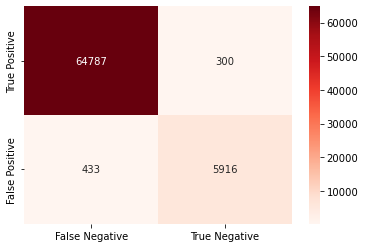

In [188]:
from sklearn.metrics import confusion_matrix

matrix_confusion = confusion_matrix(y_test, y_pred_random_forest_test)

print('\nTrue Positives(TP) = ', matrix_confusion[0,0])
print('True Negatives(TN) = ', matrix_confusion[1,1])
print('False Positives(FP) = ', matrix_confusion[0,1])
print('False Negatives(FN) = ', matrix_confusion[1,0])
print('\n')

new_matrix = pd.DataFrame(data=matrix_confusion, columns=['False Negative', 'True Negative'], 
                                 index=['True Positive', 'False Positive'])

sns.heatmap(new_matrix, annot=True, fmt='d', cmap = 'Reds')

In [189]:
TP = matrix_confusion[0,0] 
TN = matrix_confusion[1,1] 
FP = matrix_confusion[0,1] 
FN = matrix_confusion[1,0] 

In [190]:
accuracy = (TP+TN) / float(TP+TN+FP+FN)
print('Accuracy : {0:0.4f}'.format(accuracy))

precision = TP / float(TP + FP)
print('\nPrecision: {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)
print('\nRecall : {0:0.4f}'.format(recall))

Accuracy : 0.9897

Precision: 0.9954

Recall : 0.9934


ROC - AUC Curve

In [192]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc

FP_rate, TP_rate, thresholds = roc_curve(y_test, y_pred_random_forest_test)
roc_auc_curve = auc(FP_rate, TP_rate)
print(roc_auc_curve)

0.9635955340756542


Text(0.5, 0, 'False Positive Rate')

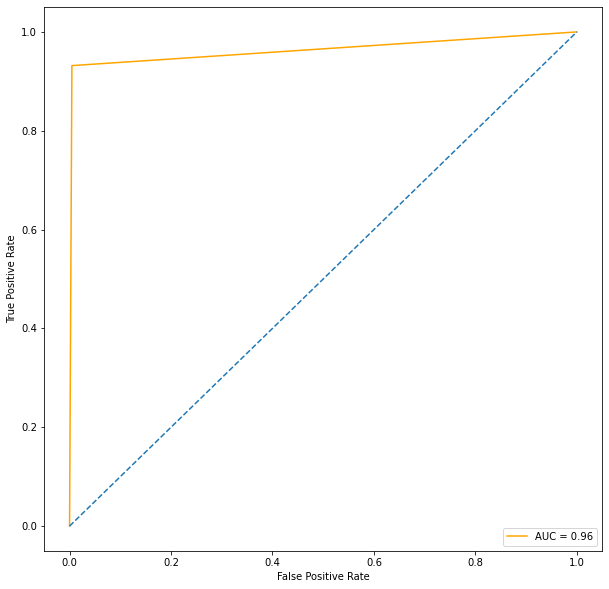

In [193]:
plt.figure(figsize=(10 , 10))

plt.plot(FP_rate,TP_rate, color='orange',label = 'AUC = %0.2f' % roc_auc_curve)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
#Good Classification